# Tracing Paths of Spherically Scattered Photons

In [1]:
import physicl
import numpy as np
import physicl.light
import physicl.newton
import time

sim = physicl.Simulation(cl_on=True, exit=lambda cond: cond.t >= physicl.Measurement(5.0, "s**1"))

sim.add_step(2, physicl.UpdateTimeStep(lambda c: physicl.Measurement(0.005, "s**1")))
sim.add_step(1, physicl.newton.NewtonianKinematicsStep())
sim.add_step(3, physicl.light.ScatterSphericalStep(0.0001, 0.001))
tp = physicl.light.TracePathMeasureStep(None)
sim.add_step(0, tp)

sim.add_objs(physicl.light.generate_photons(1000, bins=10, min=physicl.light.E_from_wavelength(physicl.Measurement(200e-9, "m**1")), max=physicl.light.E_from_wavelength(physicl.Measurement(700e-9, "m**1"))))

For this example, we will demonstrate path tracing using `phys.light.TracePathMeasureStep`. We will run the simulation for $0.100 s$ of time with a normal distribution of wavelengths. After this, we will start the simulation.

In [2]:
sim.start()

while sim.running:
    time.sleep(1)
    print(sim.get_state())

{'objects': 1000, 't': 0.075 s**1, 'dt': 0.005 s**1, 'run_time': 1.055037498474121}
{'objects': 1000, 't': 0.15000000000000005 s**1, 'dt': 0.005 s**1, 'run_time': 2.0680148601531982}
{'objects': 1000, 't': 0.2200000000000001 s**1, 'dt': 0.005 s**1, 'run_time': 3.0743119716644287}
{'objects': 1000, 't': 0.29500000000000015 s**1, 'dt': 0.005 s**1, 'run_time': 4.086088180541992}
{'objects': 1000, 't': 0.3650000000000002 s**1, 'dt': 0.005 s**1, 'run_time': 5.092881441116333}
{'objects': 1000, 't': 0.4350000000000003 s**1, 'dt': 0.005 s**1, 'run_time': 6.102269411087036}
{'objects': 1000, 't': 0.5100000000000003 s**1, 'dt': 0.005 s**1, 'run_time': 7.109041213989258}
{'objects': 1000, 't': 0.5800000000000004 s**1, 'dt': 0.005 s**1, 'run_time': 8.150161027908325}
{'objects': 1000, 't': 0.6500000000000005 s**1, 'dt': 0.005 s**1, 'run_time': 9.156927108764648}
{'objects': 1000, 't': 0.7250000000000005 s**1, 'dt': 0.005 s**1, 'run_time': 10.167539119720459}
{'objects': 1000, 't': 0.7950000000000

After that, the instance of `phys.light.TracePathMeasureStep` will have the locations of every photon at every measured point of the simulation. The `data` attribute after the simulation runs will be a 2D array with the first row representing the times collected, and the remaining rows representing each object examined with some identifier (which is by default the string representation of their type).

In [3]:
tp.data[-1]

["<class 'physicl.light.PhotonObject'>",
 [1498962.29       0.         0.  ] m**1,
 [2997924.58       0.         0.  ] m**1,
 [4496886.87       0.         0.  ] m**1,
 [5995849.16       0.         0.  ] m**1,
 [7494811.45       0.         0.  ] m**1,
 [8993773.74       0.         0.  ] m**1,
 [10492736.03        0.          0.  ] m**1,
 [11991698.32        0.          0.  ] m**1,
 [13490660.61        0.          0.  ] m**1,
 [14989622.9        0.         0. ] m**1,
 [16488585.19        0.          0.  ] m**1,
 [16358900.78865842 -1491008.6900638    -83444.52675258] m**1,
 [16229216.38731684 -2982017.38012759  -166889.05350516] m**1,
 [16881763.23755864 -1686226.61048574  -543713.72943883] m**1,
 [17534310.08780045  -390435.84084388  -920538.40537249] m**1,
 [18186856.93804225   905354.92879798 -1297363.08130616] m**1,
 [18839403.78828405  2201145.69843983 -1674187.75723982] m**1,
 [19491950.63852585  3496936.46808169 -2051012.43317349] m**1,
 [19337891.08506137  3538078.57986189  -5605

In [4]:
tp.data[0:3]

[['t',
  0.005 s**1,
  0.01 s**1,
  0.015 s**1,
  0.02 s**1,
  0.025 s**1,
  0.030000000000000002 s**1,
  0.035 s**1,
  0.04 s**1,
  0.045 s**1,
  0.049999999999999996 s**1,
  0.05499999999999999 s**1,
  0.05999999999999999 s**1,
  0.06499999999999999 s**1,
  0.06999999999999999 s**1,
  0.075 s**1,
  0.08 s**1,
  0.085 s**1,
  0.09000000000000001 s**1,
  0.09500000000000001 s**1,
  0.10000000000000002 s**1,
  0.10500000000000002 s**1,
  0.11000000000000003 s**1,
  0.11500000000000003 s**1,
  0.12000000000000004 s**1,
  0.12500000000000003 s**1,
  0.13000000000000003 s**1,
  0.13500000000000004 s**1,
  0.14000000000000004 s**1,
  0.14500000000000005 s**1,
  0.15000000000000005 s**1,
  0.15500000000000005 s**1,
  0.16000000000000006 s**1,
  0.16500000000000006 s**1,
  0.17000000000000007 s**1,
  0.17500000000000007 s**1,
  0.18000000000000008 s**1,
  0.18500000000000008 s**1,
  0.19000000000000009 s**1,
  0.1950000000000001 s**1,
  0.2000000000000001 s**1,
  0.2050000000000001 s**1,
  0.

From here, we can then plot the path of the photons over time. Here, we use a matplotlib 3D plot and scatter plot to highlight the paths taken of several photons, and we do this by collecting the coordinates from the different axes before passing them to matplotlib. As can be seen, the photons move for a while before ocassionally scattering.

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in [0, 1]:
    xs = [x[0] for x in tp.data[1 + i][1:]]
    ys = [x[1] for x in tp.data[1 + i][1:]]
    zs = [x[2] for x in tp.data[1 + i][1:]]
    ax.plot(xs, ys, zs, label="Path of Photon " + str(i))
    ax.scatter(xs, ys, zs)
ax.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

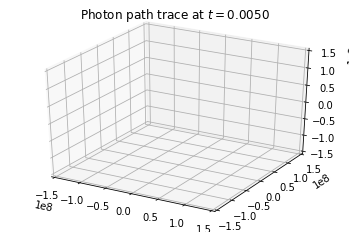

In [6]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def update(frame):
    plt.cla()
    plt.xlim(-1.5e8, 1.5e8)
    plt.ylim(-1.5e8, 1.5e8)
    plt.title("Photon path trace at $t = {:.4f}$".format(tp.data[0][frame + 1]))
    ax.set_zlim(-1.5e8, 1.5e8)
    for i in [0, 1, 2, 3]:
        xs = [x[0] for x in tp.data[1 + i][1:(frame + 1)]]
        ys = [x[1] for x in tp.data[1 + i][1:(frame + 1)]]
        zs = [x[2] for x in tp.data[1 + i][1:(frame + 1)]]
        ax.plot(xs, ys, zs, label="Path of Photon " + str(i))
        ax.scatter(xs, ys, zs)
        
ani = FuncAnimation(fig, update, len(tp.data[2]) - 1)
ani.save("trace_path.mp4", "ffmpeg", fps=60, dpi=144)

plt.show()